<a href="https://colab.research.google.com/github/Ishita95-harvad/Coffee-Supply-Chain-Analysis-Global-Coffee-Production-Supply-and-Distribution-Data-1960-2023-/blob/main/Coffee_Supply_Chain_Analysis_Global_Coffee_Production%2C_Supply%2C_and_Distribution_Data_(1960%E2%80%932023).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Coffee Supply Chain Analysis**
Global Coffee Production, Supply, and Distribution Data (1960–2023)

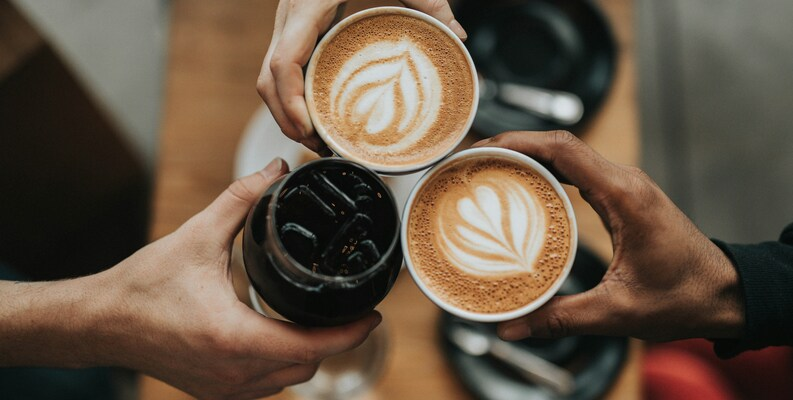

## Data loading

### Subtask:
Load the coffee data from the provided CSV file into a pandas DataFrame.


**Reasoning**:
Load the coffee data from the provided CSV file into a pandas DataFrame and display the first few rows along with the shape of the DataFrame.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('coffee.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'coffee.csv' not found.")
except pd.errors.EmptyDataError:
    print("Error: 'coffee.csv' is empty.")
except pd.errors.ParserError:
    print("Error: Unable to parse 'coffee.csv'. Check file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Error: Unable to parse 'coffee.csv'. Check file format.


**Reasoning**:
The previous attempt to load the data failed due to a parsing error.  I will try again but with the error_bad_lines parameter set to skip bad lines and warn about them.  This might allow loading the majority of the data.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('coffee.csv', on_bad_lines='warn')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'coffee.csv' not found.")
except pd.errors.EmptyDataError:
    print("Error: 'coffee.csv' is empty.")
except pd.errors.ParserError:
    print("Error: Unable to parse 'coffee.csv'. Check file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

<ipython-input-2-817edb092de4>:4: ParserWarning: Skipping line 2946: expected 22 fields, saw 23
Skipping line 2947: expected 22 fields, saw 23
Skipping line 2948: expected 22 fields, saw 23
Skipping line 2949: expected 22 fields, saw 23
Skipping line 2950: expected 22 fields, saw 23
Skipping line 2951: expected 22 fields, saw 23
Skipping line 2952: expected 22 fields, saw 23
Skipping line 2953: expected 22 fields, saw 23
Skipping line 2954: expected 22 fields, saw 23
Skipping line 2955: expected 22 fields, saw 23
Skipping line 2956: expected 22 fields, saw 23
Skipping line 2957: expected 22 fields, saw 23
Skipping line 2958: expected 22 fields, saw 23
Skipping line 2959: expected 22 fields, saw 23
Skipping line 2960: expected 22 fields, saw 23
Skipping line 2961: expected 22 fields, saw 23
Skipping line 2962: expected 22 fields, saw 23
Skipping line 2963: expected 22 fields, saw 23
Skipping line 2964: expected 22 fields, saw 23
Skipping line 2965: expected 22 fields, saw 23
Skipping li

,Country,Year,Arabica Production,Bean Exports,Bean Imports,Beginning Stocks,Domestic Consumption,Ending Stocks,Exports,Imports,...,Roast & Ground Exports,Roast & Ground Imports,Robusta Production,Rst Ground Dom Consum,Soluble Dom Cons,Soluble Exports,Soluble Imports,Total Distribution,Total_Supply,Unnamed: 21
0,Albania,1960,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,Albania,1961,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,Albania,1962,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,Albania,1963,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,Albania,1964,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


(5952, 22)


## Data exploration

### Subtask:
Explore the loaded coffee data to understand its characteristics.


**Reasoning**:
Examine data types, summary statistics, missing values, and distributions to understand the data characteristics.  Visualize missing data and distributions using heatmaps and histograms respectively.



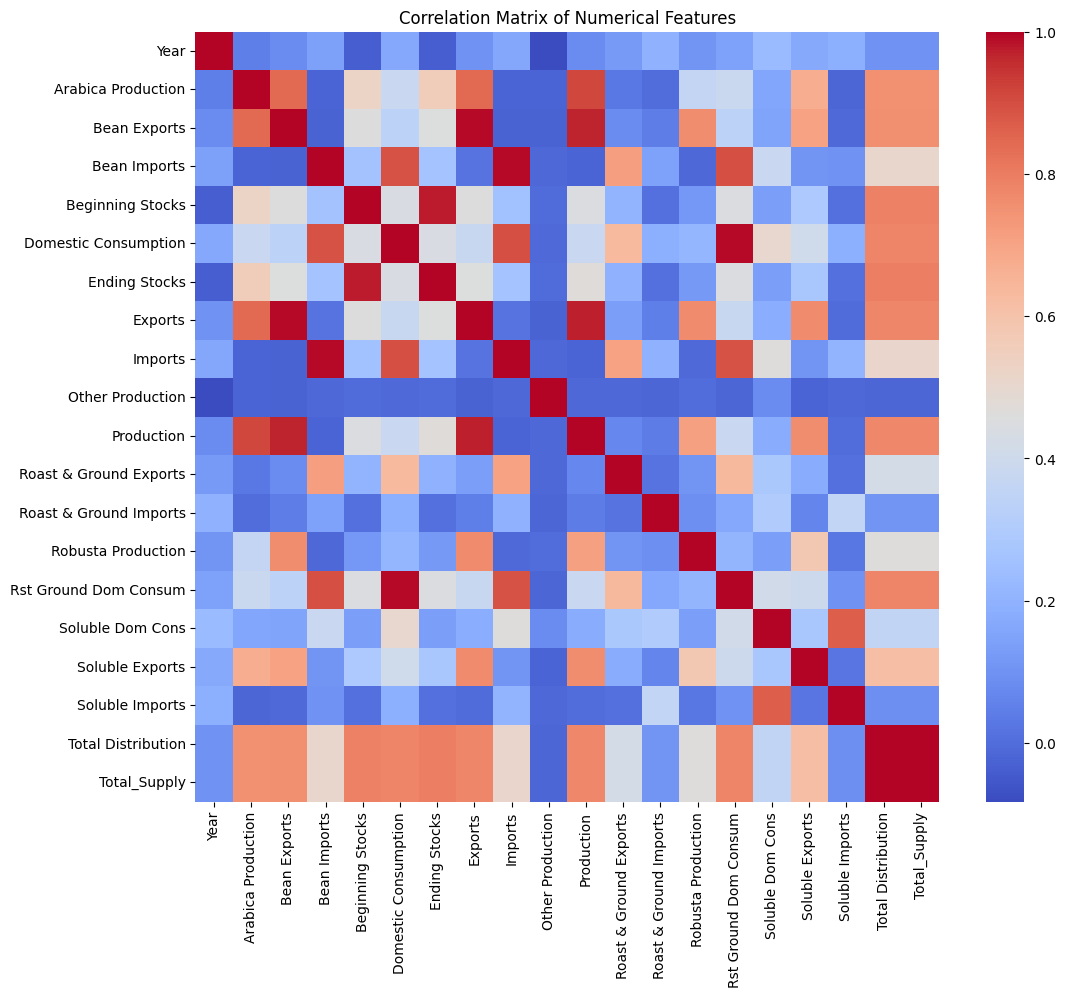

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Correlation analysis for numerical features only
numerical_df = df.select_dtypes(include=np.number)
numerical_df = numerical_df.drop(columns=['Unnamed: 21'])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Data cleaning

### Subtask:
Clean the coffee dataset by handling missing values and inconsistencies.


**Reasoning**:
Drop the unnecessary 'Unnamed: 21' column, handle missing values by imputation or removal, address inconsistencies in data types and duplicates, and verify the cleaning process.



In [ ]:
# Drop the 'Unnamed: 21' column as it contains only NaN values.
df = df.drop(columns=['Unnamed: 21'])

# Check for and handle missing values.  Since most missing values are zeros which might represent no production or trade,
# we can leave them as they are, or replace with 0 if needed.
# Check data types and convert as needed
for col in df.columns:
    if df[col].dtype == 'object':
        # Handle potential inconsistencies in string columns, if necessary
        pass  # No specific cleaning needed for string columns in this step

# Remove duplicate rows, if any
df = df.drop_duplicates()

# Verify cleaning
print(df.isnull().sum())
print(df.duplicated().sum())
display(df.head())
print(df.shape)

Country                   0
Year                      0
Arabica Production        0
Bean Exports              0
Bean Imports              0
Beginning Stocks          0
Domestic Consumption      0
Ending Stocks             0
Exports                   0
Imports                   0
Other Production          0
Production                0
Roast & Ground Exports    0
Roast & Ground Imports    0
Robusta Production        0
Rst Ground Dom Consum     0
Soluble Dom Cons          0
Soluble Exports           0
Soluble Imports           0
Total Distribution        0
Total_Supply              0
dtype: int64
0


,Country,Year,Arabica Production,Bean Exports,Bean Imports,Beginning Stocks,Domestic Consumption,Ending Stocks,Exports,Imports,...,Production,Roast & Ground Exports,Roast & Ground Imports,Robusta Production,Rst Ground Dom Consum,Soluble Dom Cons,Soluble Exports,Soluble Imports,Total Distribution,Total_Supply
0,Albania,1960,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Albania,1961,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Albania,1962,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Albania,1963,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Albania,1964,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(5952, 21)


## Data analysis

### Subtask:
Perform descriptive statistics and correlation analysis on the cleaned coffee dataset.


**Reasoning**:
Calculate descriptive statistics and the correlation matrix for the numerical features in the dataframe. Visualize the correlation matrix using a heatmap.



,Year,Arabica Production,Bean Exports,Bean Imports,Beginning Stocks,Domestic Consumption,Ending Stocks,Exports,Imports,Other Production,Production,Roast & Ground Exports,Roast & Ground Imports,Robusta Production,Rst Ground Dom Consum,Soluble Dom Cons,Soluble Exports,Soluble Imports,Total Distribution,Total_Supply
count,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000,5952.00000,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000
mean,1991.500000,752.346942,823.335013,369.232863,462.159274,672.145497,454.224462,905.267473,426.820901,2.235047,1142.65709,13.304603,10.143481,388.075101,586.722950,85.422547,68.627856,46.549563,2031.637433,2031.637265
std,18.474505,3366.326900,2911.659266,3067.206498,3132.399393,3324.761972,3055.586315,3182.139107,3124.241351,20.557252,4455.22125,123.014168,60.235124,1939.053072,3151.181861,379.920289,349.020035,301.244868,7506.541567,7506.541611
min,1960.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1975.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1991.500000,0.000000,5.000000,0.000000,0.000000,15.000000,0.000000,10.000000,0.000000,0.000000,25.00000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,115.000000,115.000000
75%,2007.250000,205.000000,343.750000,0.000000,86.000000,225.000000,85.000000,456.000000,2.000000,0.000000,590.50000,0.000000,0.000000,29.000000,186.250000,1.000000,0.000000,0.000000,1096.250000,1096.250000
max,2023.000000,49700.000000,41689.000000,47000.000000,72461.000000,49070.000000,72461.000000,45675.000000,47000.000000,375.000000,69900.00000,2975.000000,1060.000000,30480.000000,47010.000000,6745.000000,4300.000000,6000.000000,97806.000000,97806.000000


,Year,Arabica Production,Bean Exports,Bean Imports,Beginning Stocks,Domestic Consumption,Ending Stocks,Exports,Imports,Other Production,Production,Roast & Ground Exports,Roast & Ground Imports,Robusta Production,Rst Ground Dom Consum,Soluble Dom Cons,Soluble Exports,Soluble Imports,Total Distribution,Total_Supply
Year,1.000000,0.045701,0.082158,0.140039,-0.036818,0.163637,-0.038086,0.098361,0.159518,-0.082487,0.080273,0.121369,0.192380,0.105971,0.145140,0.228188,0.168613,0.188532,0.098671,0.098671
Arabica Production,0.045701,1.000000,0.844082,-0.020356,0.526372,0.381176,0.553472,0.847214,-0.021503,-0.023112,0.914170,0.028338,0.001954,0.364599,0.383401,0.155701,0.672706,-0.015623,0.753270,0.753270
Bean Exports,0.082158,0.844082,1.000000,-0.024386,0.462767,0.338103,0.457606,0.995727,-0.023825,-0.024966,0.968699,0.081861,0.043308,0.760590,0.338276,0.153035,0.707158,-0.006619,0.758126,0.758126
Bean Imports,0.140039,-0.020356,-0.024386,1.000000,0.258569,0.891238,0.263384,0.016865,0.994318,-0.012421,-0.021283,0.716317,0.141777,-0.013429,0.894320,0.381623,0.104727,0.102411,0.509104,0.509104
Beginning Stocks,-0.036818,0.526372,0.462767,0.258569,1.000000,0.439903,0.978344,0.462755,0.254859,-0.006334,0.447991,0.201480,0.009241,0.115566,0.447947,0.134269,0.287507,0.009069,0.789250,0.789250
Domestic Consumption,0.163637,0.381176,0.338103,0.891238,0.439903,1.000000,0.440353,0.378096,0.897107,-0.007513,0.379941,0.631805,0.189997,0.211296,0.994549,0.502094,0.403968,0.192220,0.782445,0.782445
Ending Stocks,-0.038086,0.553472,0.457606,0.263384,0.978344,0.440353,1.000000,0.456837,0.260193,-0.005792,0.470438,0.200203,0.008756,0.120088,0.448293,0.135334,0.277059,0.010125,0.795756,0.795756
Exports,0.098361,0.847214,0.995727,0.016865,0.462755,0.378096,0.456837,1.000000,0.017063,-0.025502,0.972405,0.133223,0.047212,0.763673,0.377008,0.181771,0.763661,-0.003342,0.777338,0.777338
Imports,0.159518,-0.021503,-0.023825,0.994318,0.254859,0.897107,0.260193,0.017063,1.000000,-0.013897,-0.020325,0.704524,0.193243,-0.009222,0.890582,0.463998,0.106015,0.203882,0.510489,0.510489
Other Production,-0.082487,-0.023112,-0.024966,-0.012421,-0.006334,-0.007513,-0.005792,-0.025502,-0.013897,1.000000,-0.013596,-0.011532,-0.017267,-0.001716,-0.017643,0.080586,-0.020170,-0.013884,-0.016496,-0.016496


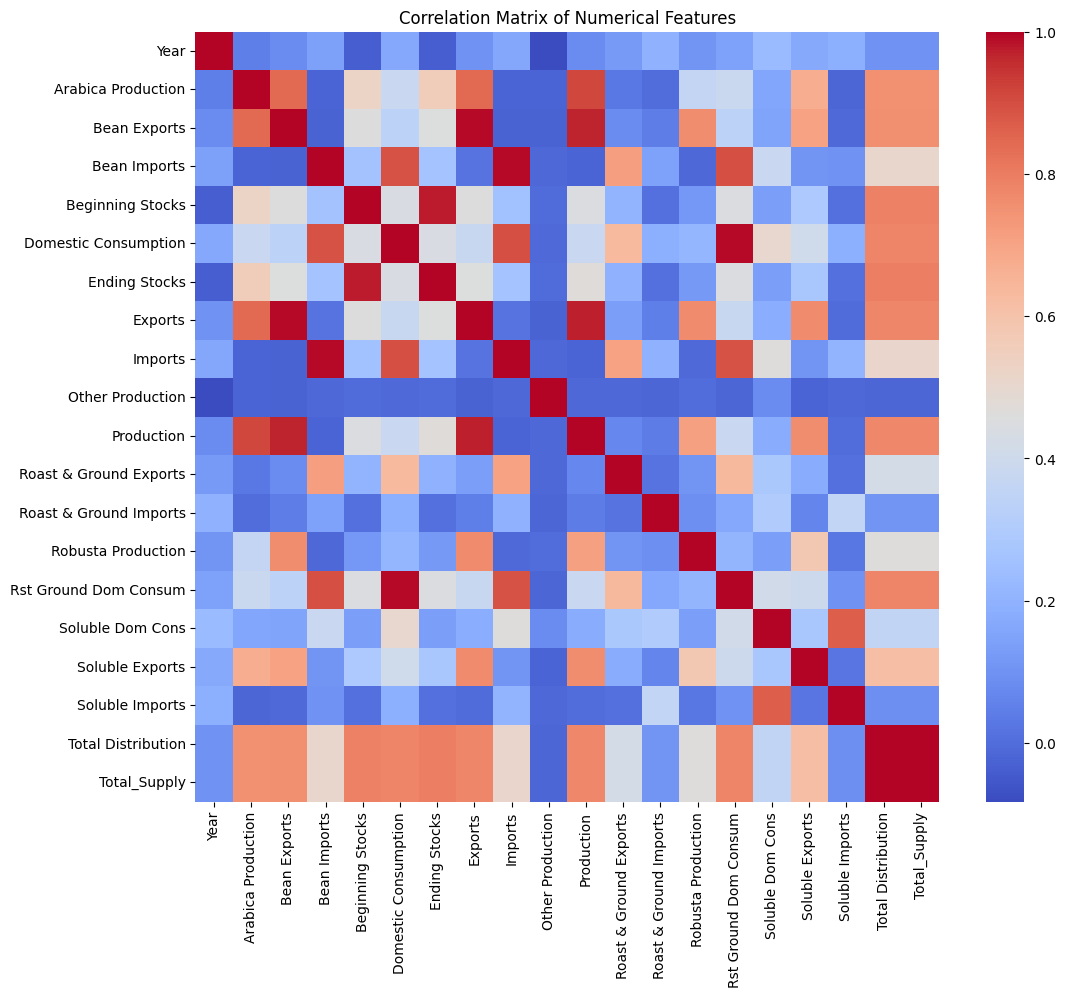

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Descriptive statistics for numerical columns
numerical_df = df.select_dtypes(include=np.number)
numerical_stats = numerical_df.describe()
display(numerical_stats)

# Correlation analysis for numerical features only
correlation_matrix = numerical_df.corr()
display(correlation_matrix)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Data visualization

### Subtask:
Visualize key relationships and distributions within the coffee dataset.


**Reasoning**:
Visualize the data distributions using histograms, scatter plots, and boxplots to understand the relationships and distributions within the coffee dataset.



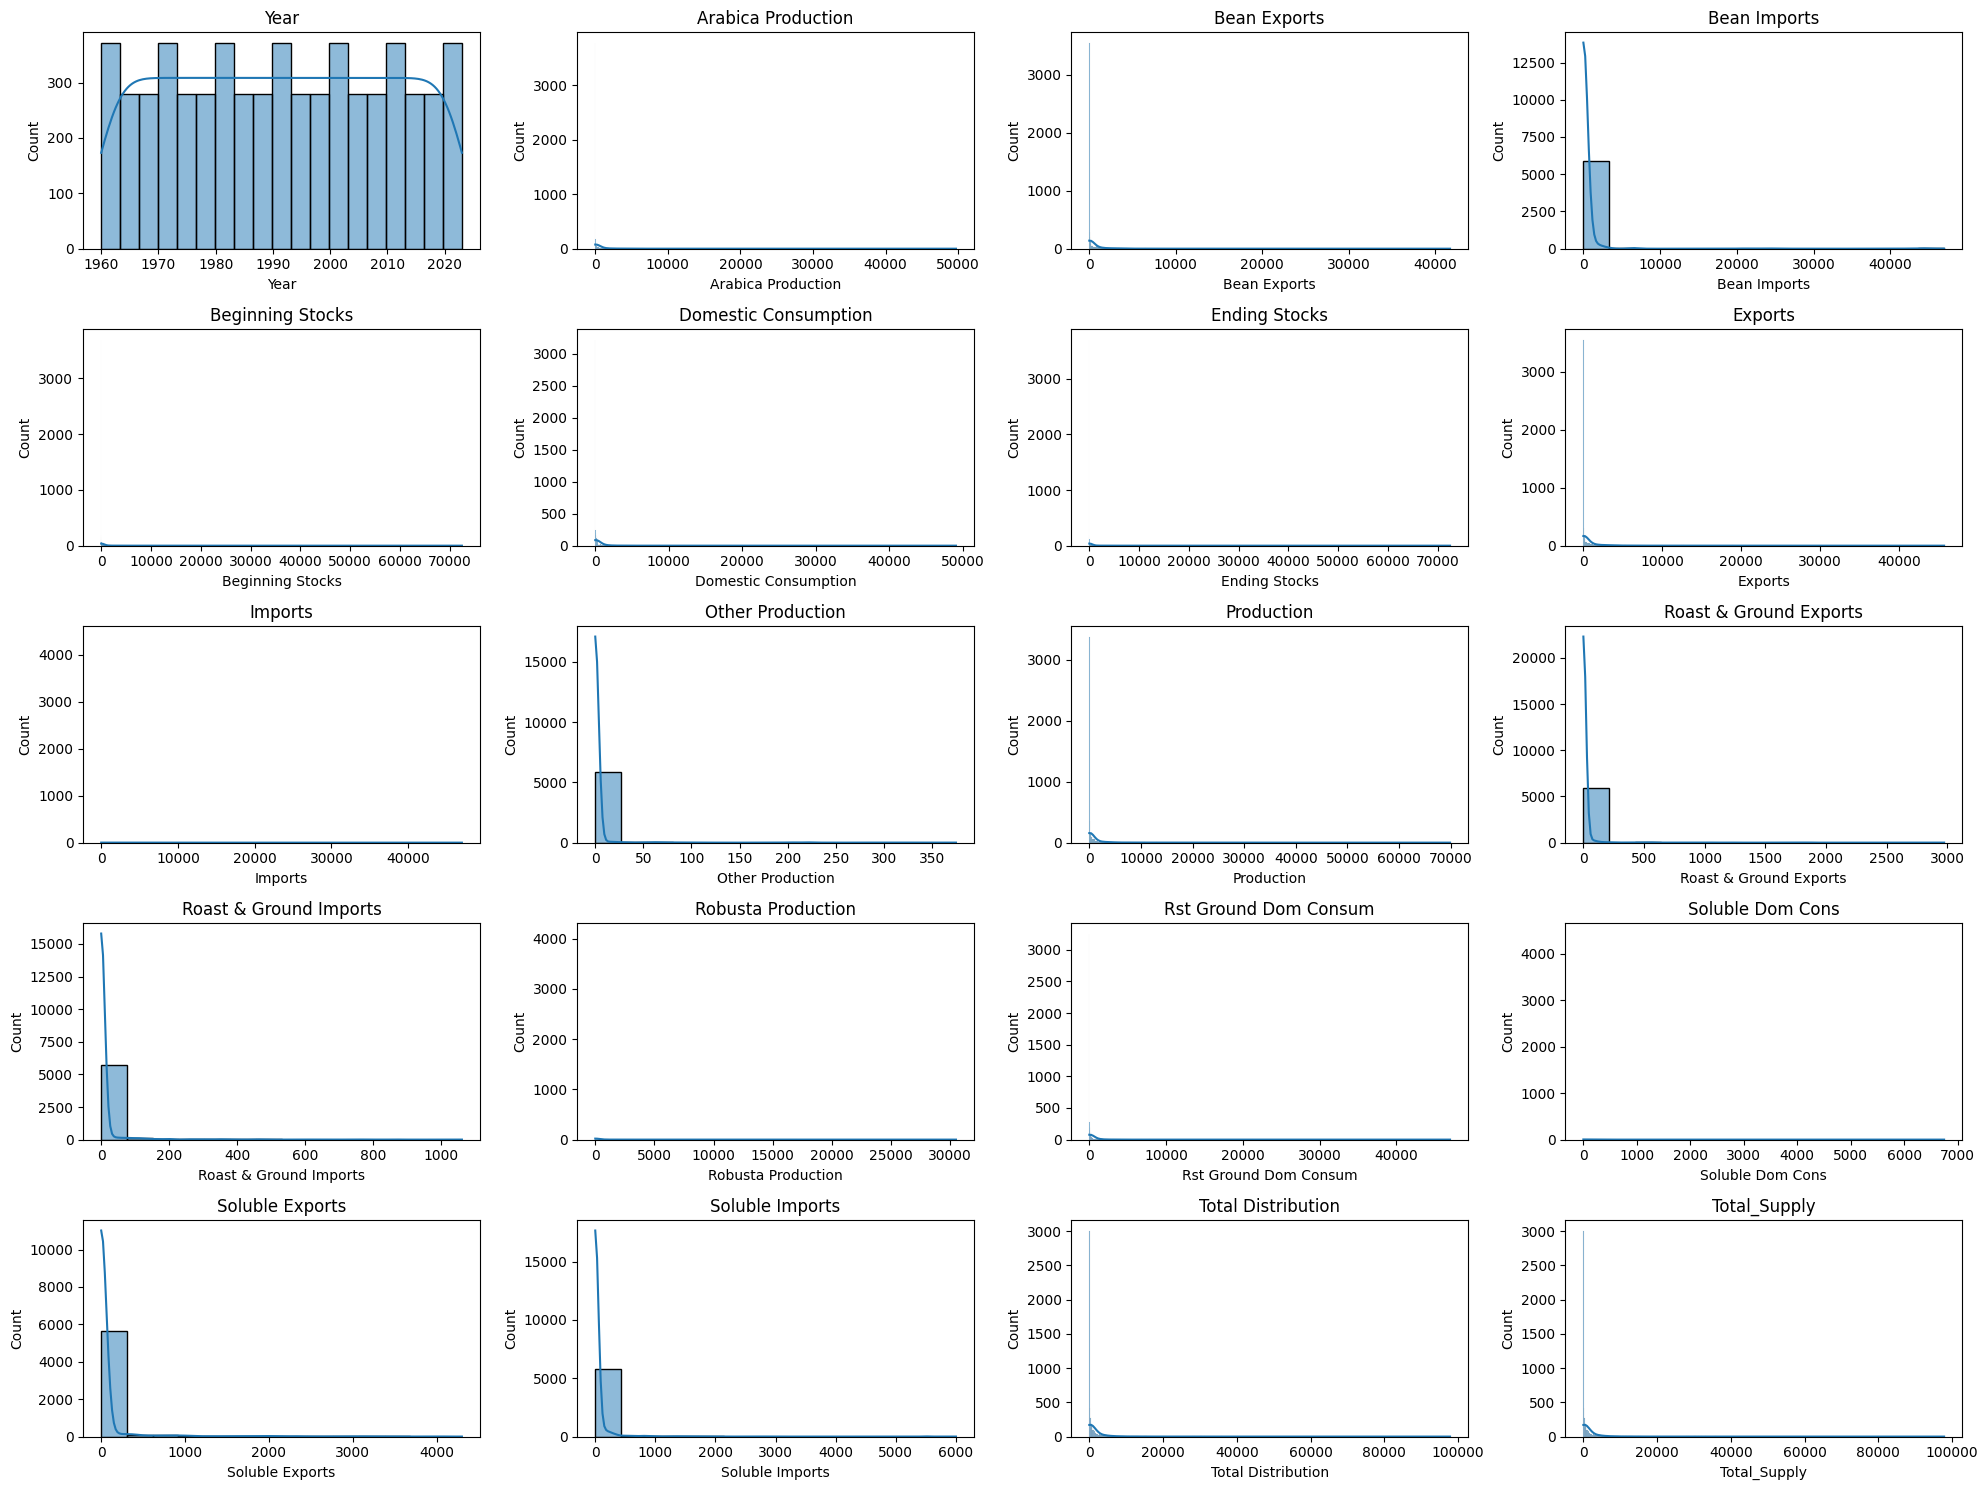

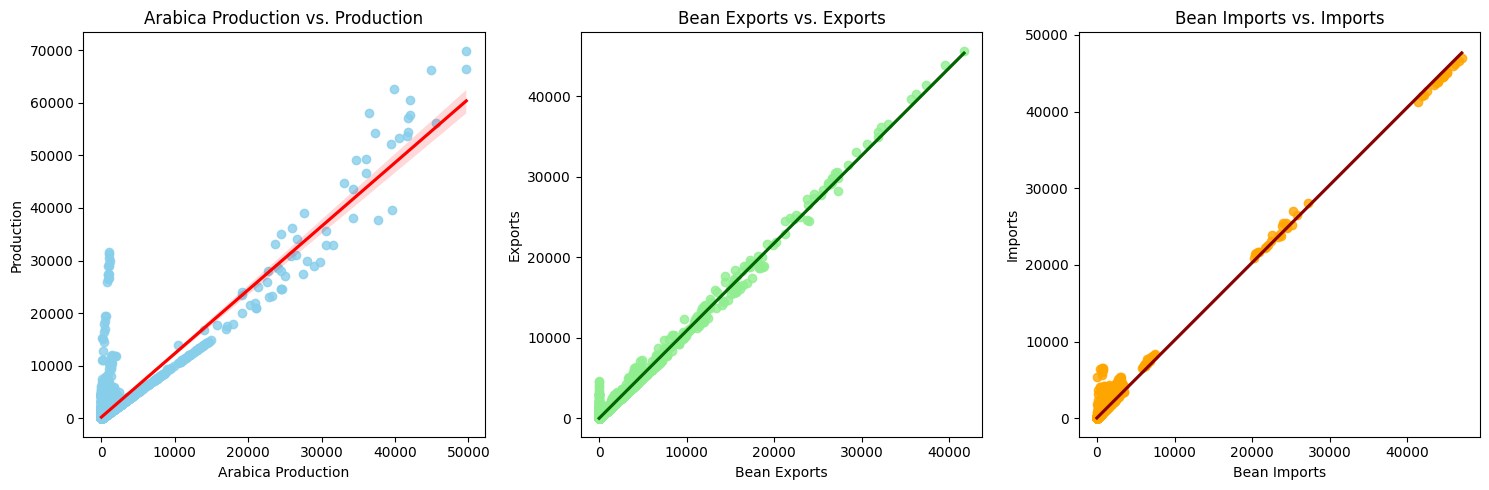

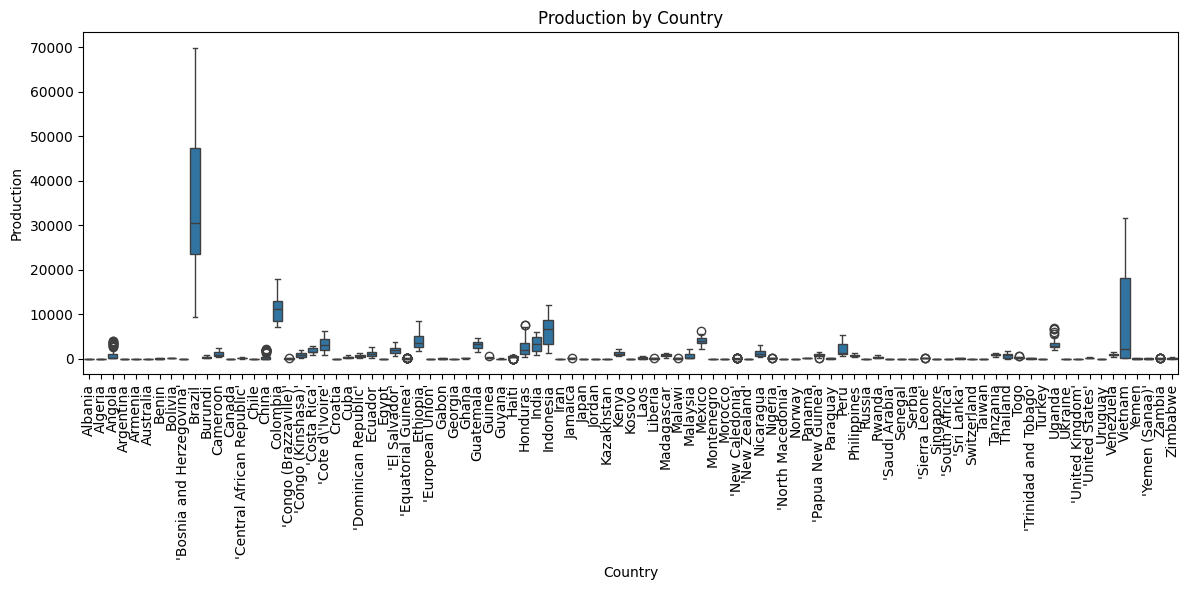

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_df.columns):
    plt.subplot(5, 4, i + 1)
    sns.histplot(numerical_df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Scatter plots for correlated features
plt.figure(figsize=(15, 5))

# Example 1: Arabica Production vs. Production
plt.subplot(1, 3, 1)
sns.regplot(x='Arabica Production', y='Production', data=numerical_df, scatter_kws={"color": "skyblue"}, line_kws={"color": "red"})
plt.title('Arabica Production vs. Production')


# Example 2: Bean Exports vs. Exports
plt.subplot(1, 3, 2)
sns.regplot(x='Bean Exports', y='Exports', data=numerical_df, scatter_kws={"color": "lightgreen"}, line_kws={"color": "darkgreen"})
plt.title('Bean Exports vs. Exports')


# Example 3: Bean Imports vs. Imports
plt.subplot(1, 3, 3)
sns.regplot(x='Bean Imports', y='Imports', data=numerical_df, scatter_kws={"color": "orange"}, line_kws={"color": "darkred"})
plt.title('Bean Imports vs. Imports')

plt.tight_layout()
plt.show()


# Boxplot of 'Production' grouped by 'Country'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Production', data=df)
plt.xticks(rotation=90)
plt.title('Production by Country')
plt.tight_layout()
plt.show()